In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Calculate Camera distortion based on 20 caliberation images provided.

In [2]:
nx=9
ny=6
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

img_size = (img.shape[1], img.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)


## Apply a distortion correction to raw images.

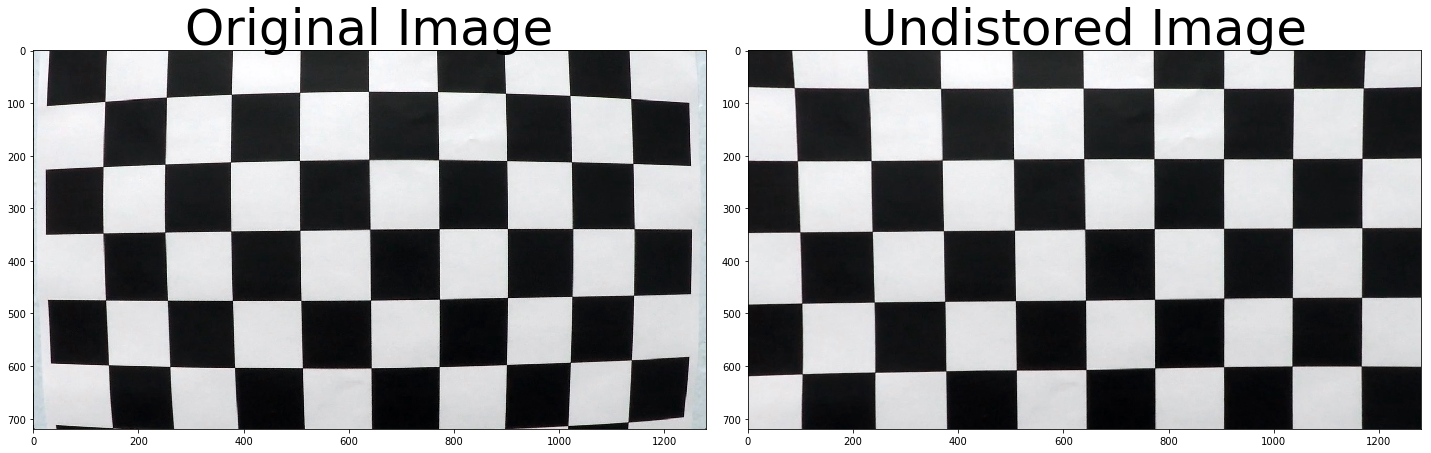

In [3]:
test_image = cv2.imread('camera_cal/calibration1.jpg')

dst = cv2.undistort(test_image, mtx, dist, None, mtx)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image',fontsize=50)
ax2.imshow(dst, cmap='gray')
ax2.set_title('Undistored Image',fontsize=50)
plt.savefig('output_images/undistored_image.png',bbox_inches='tight') 

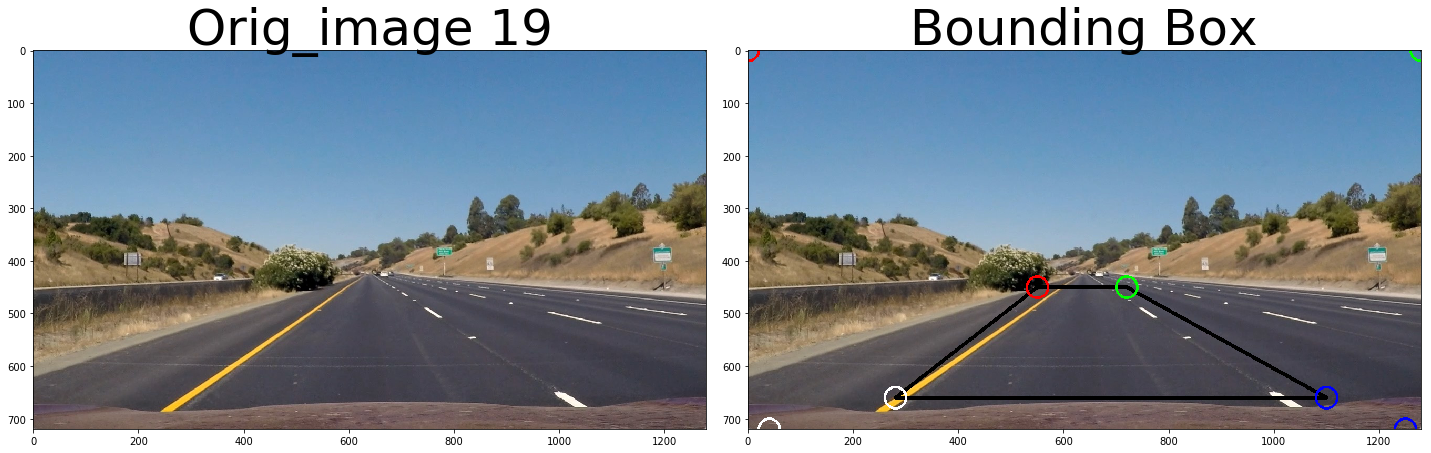

In [4]:
img = mpimg.imread('./test_images/straight_lines1.jpg')
orig_img = np.copy(img)
#points = [(575, 450), (700,450), (1075, 660), (255, 660)]
#points = [(520, 482), (810,482), (1250, 660), (220, 660)]
#leftupperpoint  = [580,460]
#rightupperpoint = [740,460] # 700
#leftlowerpoint  = [280,680]
#rightlowerpoint = [1050,680] # 1100
#points = [(520, 482), (810,482), (1250, 660), (220, 660)]
# points = [(550, 460), (740,460), (1050, 660), (280, 660)]

points = [(550, 450), (720,450), (1100, 660), (280, 660)]
#src = np.float32([[490, 482],[810, 482],
#                  [1250, 720],[0, 720]])
cv2.line(img, points[0], points[1], 0, 5)
cv2.line(img, points[1], points[2], 0, 5)
cv2.line(img, points[2], points[3], 0, 5)
cv2.line(img, points[3], points[0], 0, 5)
img = cv2.circle(img, (550, 450), 20, (255,0,0), 3) #Red
img = cv2.circle(img, (0, 0), 20, (255,0,0), 3) #Red

img = cv2.circle(img, (720,450), 20, (0,255,0), 3) #green
img = cv2.circle(img, (1280, 0), 20, (0,255,0), 3) 

img = cv2.circle(img, (1100, 660), 20, (0,0,255), 3) #Blue
img = cv2.circle(img, (1250, 720), 20, (0,0,255), 3) 

img = cv2.circle(img, (280, 660), 20, (255,255,255), 3) #white
img = cv2.circle(img, (40, 720), 20, (255,255,255), 3)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 9))
f.tight_layout()
ax1.imshow(orig_img)
ax1.set_title('Orig_image %d' %(idx), fontsize=50)
ax2.imshow(img, cmap='gray')
ax2.set_title('Bounding Box', fontsize=50)
file_name = 'output_images/Bounding_box_img' + str(idx) + '.png'
plt.savefig(file_name,bbox_inches='tight') 

# Get Perspective Transform

In [5]:
def get_undistored_perspective_image(image):
    img_size = (image.shape[1], image.shape[0])

    src = np.float32([[550, 450],[720, 450],
                      [1100, 660],[280, 660]])
 
    #dst = np.float32([[300, 0], [980, 0], 
    #                 [980, 720],[300, 720]])
    dst = np.float32([[0, 0], [1280, 0], 
                     [1250, 720],[40, 720]])
    undistort_img = cv2.undistort(img, mtx, dist, None, mtx)
    M = cv2.getPerspectiveTransform(src, dst)
    warped_img = cv2.warpPerspective(undistort_img, M, img_size)
    return warped_img

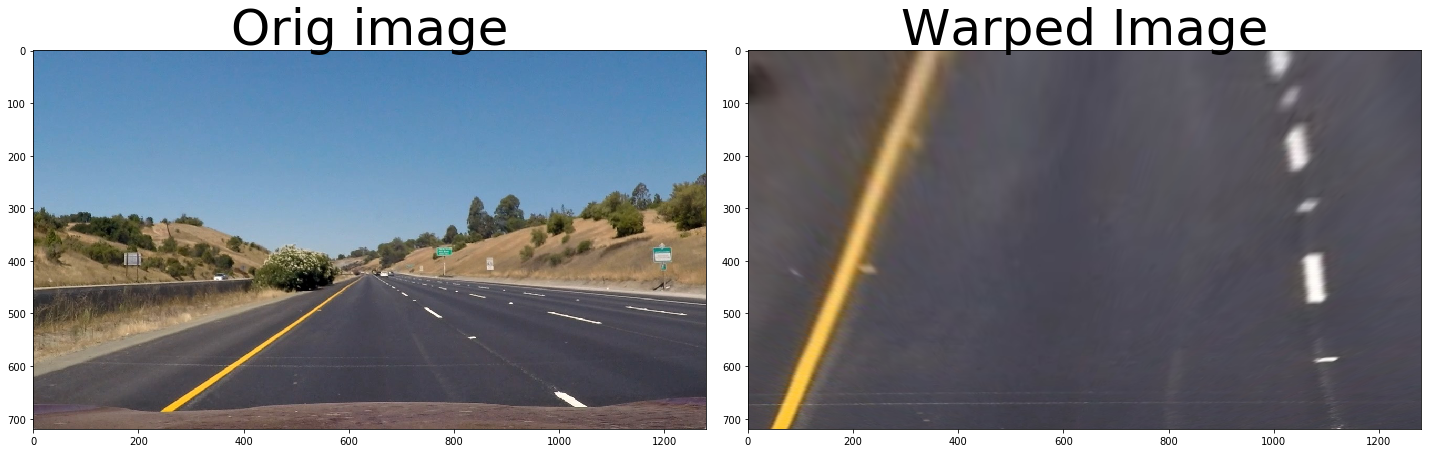

In [6]:
img = mpimg.imread('test_images/straight_lines1.jpg')
img_size = (img.shape[1], img.shape[0])
warped_img = get_undistored_perspective_image(img)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Orig image', fontsize=50)
ax2.imshow(warped_img, cmap='gray')
ax2.set_title('Warped Image', fontsize=50)
#file_name = 'output_images/undistored_warped_image' + str(idx) + '.png'
#plt.savefig(file_name,bbox_inches='tight') 


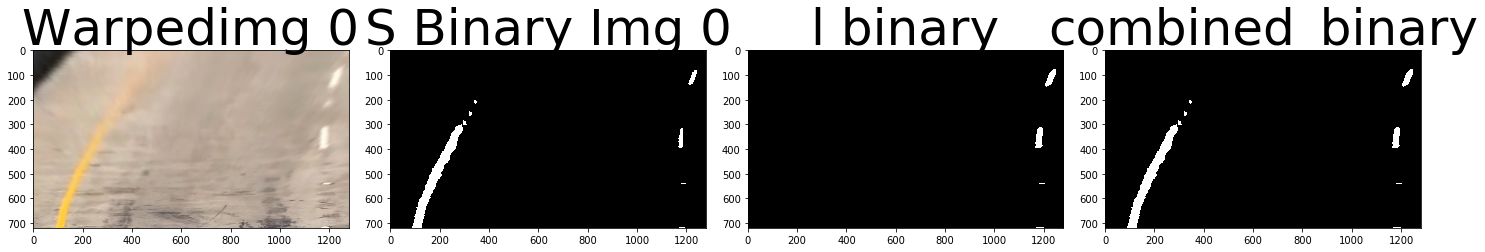

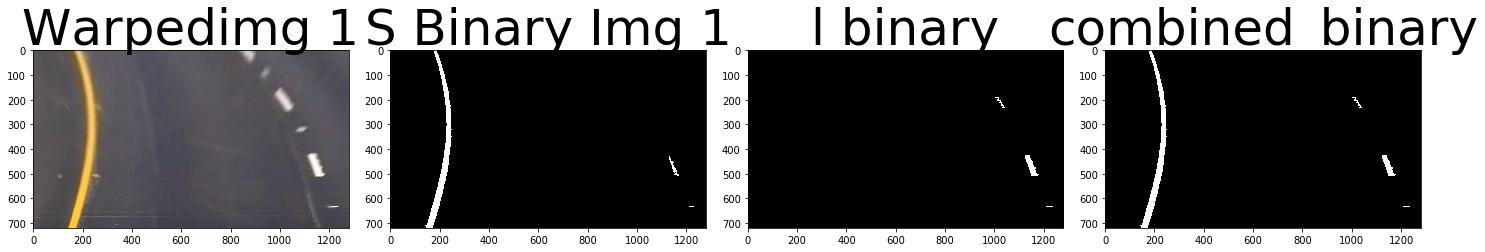

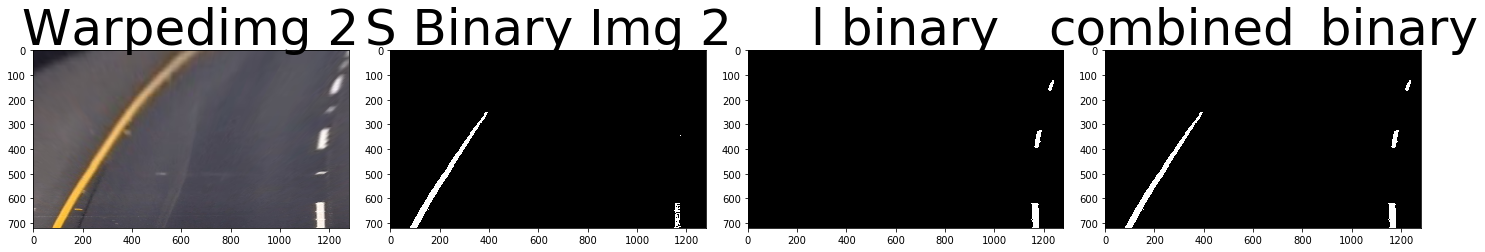

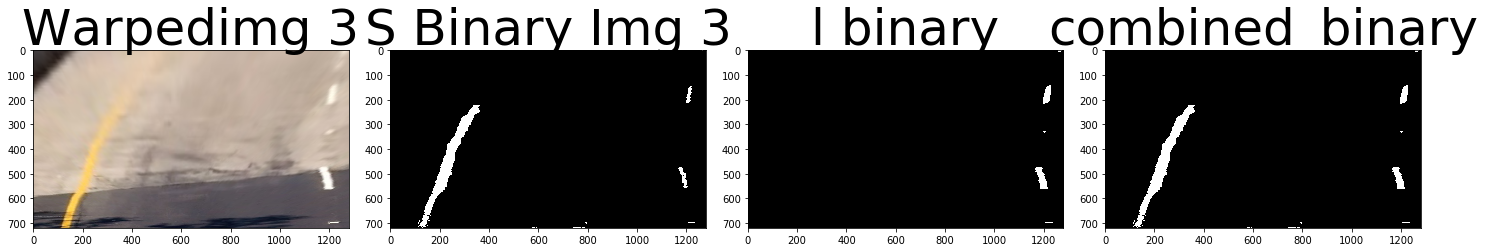

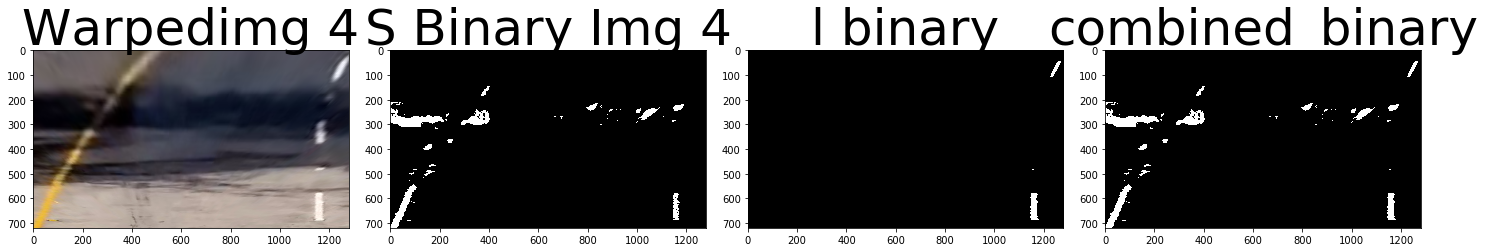

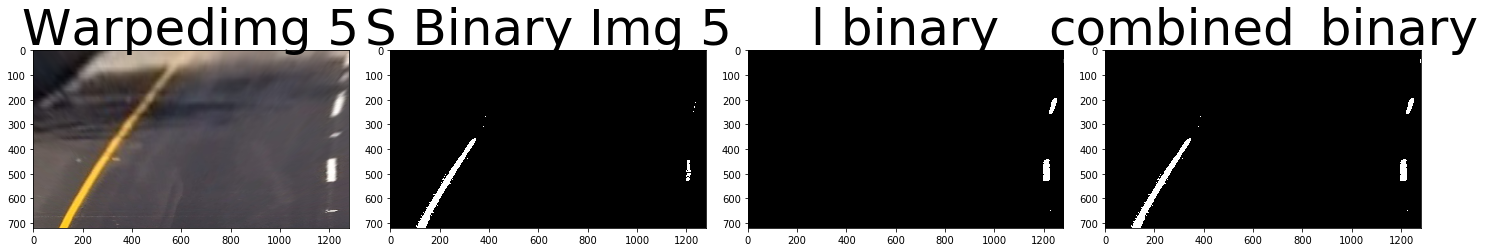

In [14]:
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    warped_img = get_undistored_perspective_image(img)
    s_channel = cv2.cvtColor(warped_img, cv2.COLOR_BGR2HLS)[:,:,2]
    
    l_channel = cv2.cvtColor(warped_img, cv2.COLOR_BGR2LUV)[:,:,0]

    b_channel = cv2.cvtColor(warped_img, cv2.COLOR_BGR2Lab)[:,:,2]   

    # Threshold color channel
    s_thresh_min = 160
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    b_thresh_min = 155
    b_thresh_max = 200
    b_binary = np.zeros_like(b_channel)
    b_binary[(b_channel >= b_thresh_min) & (b_channel <= b_thresh_max)] = 1
    
    l_thresh_min = 225
    l_thresh_max = 255
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh_min) & (l_channel <= l_thresh_max)] = 1
    
    combined_binary = np.zeros_like(s_binary)
    combined_binary[(l_binary == 1) | (s_binary ==1)] = 1
    f, (ax1,ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(warped_img)
    ax1.set_title('Warpedimg %d'%(idx), fontsize=50)
    ax2.imshow(s_binary,cmap='gray')
    ax2.set_title('S Binary Img %d'%(idx), fontsize=50)
    ax3.imshow(l_binary, cmap='gray')
    ax3.set_title('l binary', fontsize=50)
    ax4.imshow(combined_binary, cmap='gray')
    ax4.set_title('combined_binary', fontsize=50)

# Create a thresholded binary image

In [8]:
def apply_new_thresh(warped):
    s_channel = cv2.cvtColor(warped, cv2.COLOR_BGR2HLS)[:,:,2]
    
    l_channel = cv2.cvtColor(warped, cv2.COLOR_BGR2LUV)[:,:,0]

    b_channel = cv2.cvtColor(warped, cv2.COLOR_BGR2Lab)[:,:,2]   

    # Threshold color channel
    s_thresh_min = 160
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    l_thresh_min = 225
    l_thresh_max = 255
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh_min) & (l_channel <= l_thresh_max)] = 1
    
    combined_binary = np.zeros_like(s_binary)
    combined_binary[(l_binary == 1)  | (s_binary ==1)] = 1
    
    return combined_binary

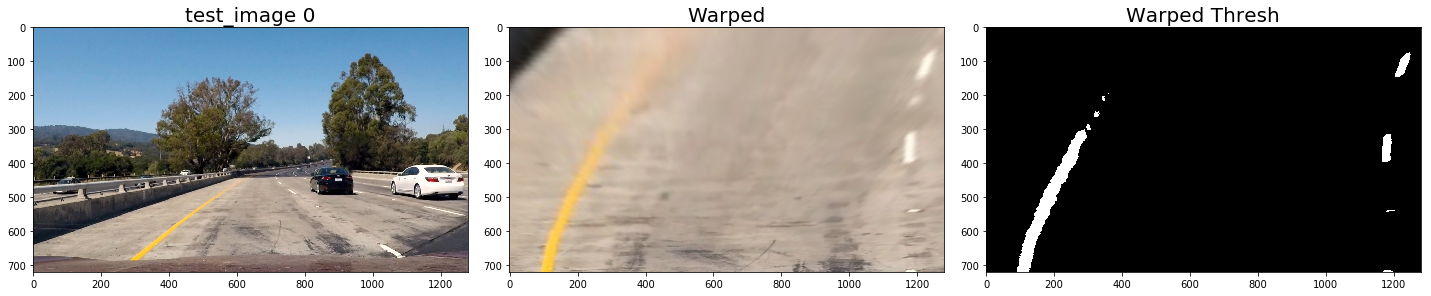

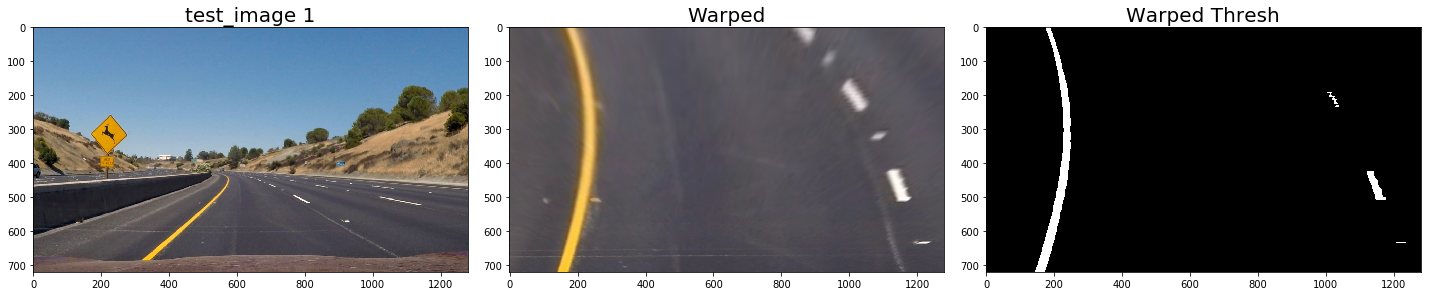

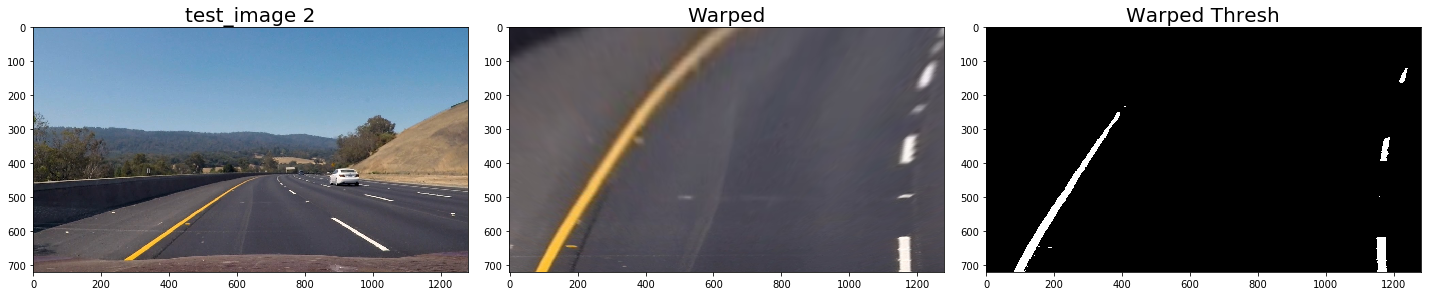

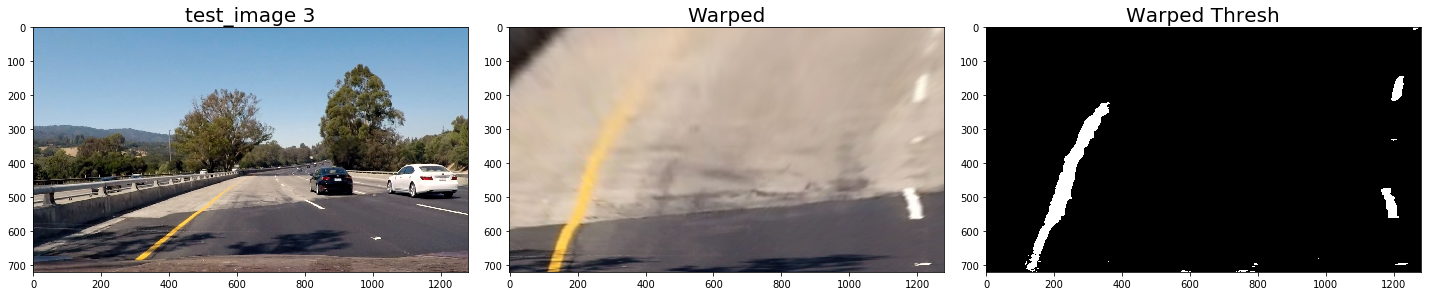

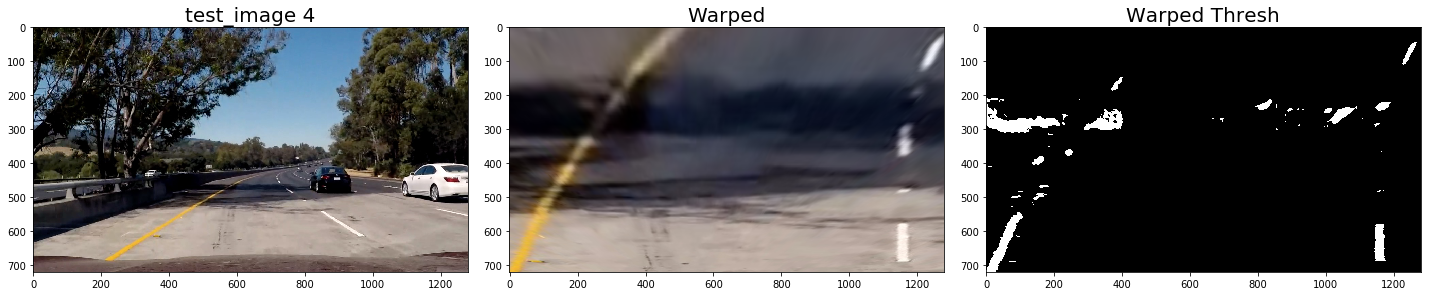

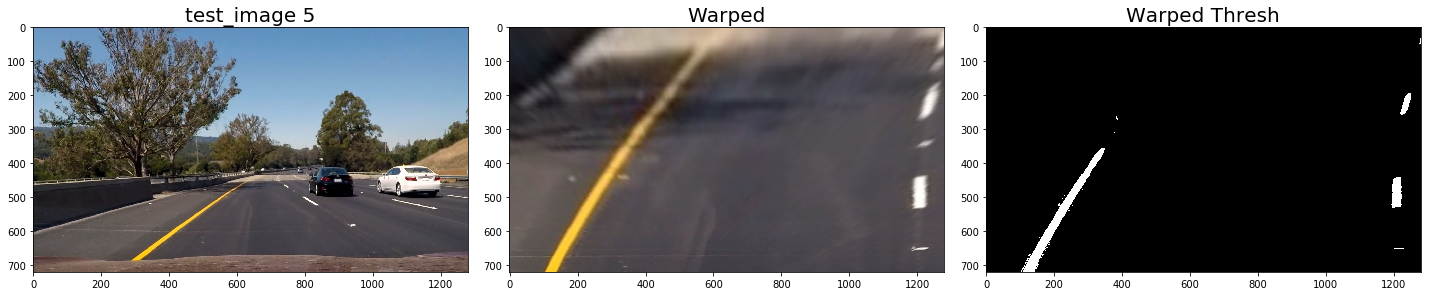

In [9]:
images = glob.glob('test_images/test*.jpg')
offset =0
ksize = 9
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
 
    warped_img = get_undistored_perspective_image(img)
    warped_thresh_img = apply_new_thresh(warped_img)
    
    f, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('test_image %d' %(idx), fontsize=20)
    ax2.imshow(warped_img, cmap='gray')
    ax2.set_title('Warped', fontsize=20)
    ax3.imshow(warped_thresh_img, cmap='gray')
    ax3.set_title('Warped Thresh', fontsize=20)
    
    #file_name = 'output_images/threshold_image' + str(idx) + '.png'
    #plt.savefig(file_name,bbox_inches='tight') 

# Plot Histogram

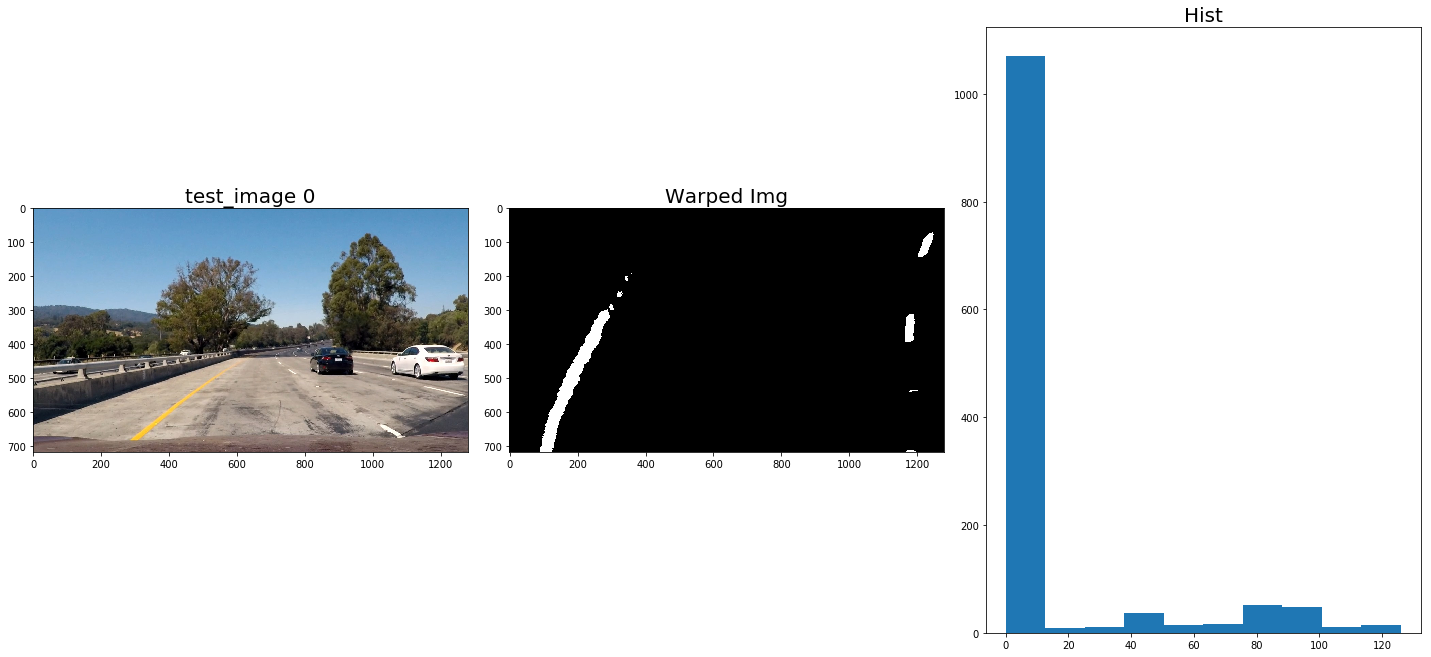

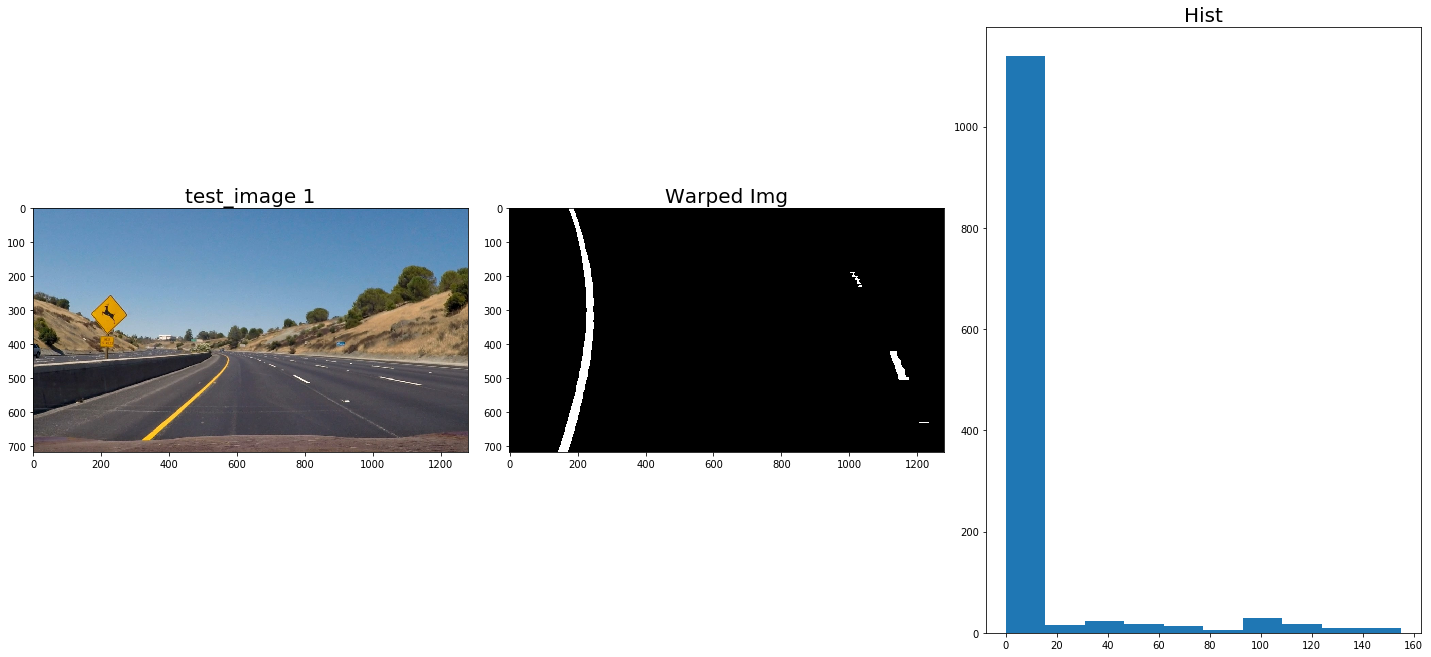

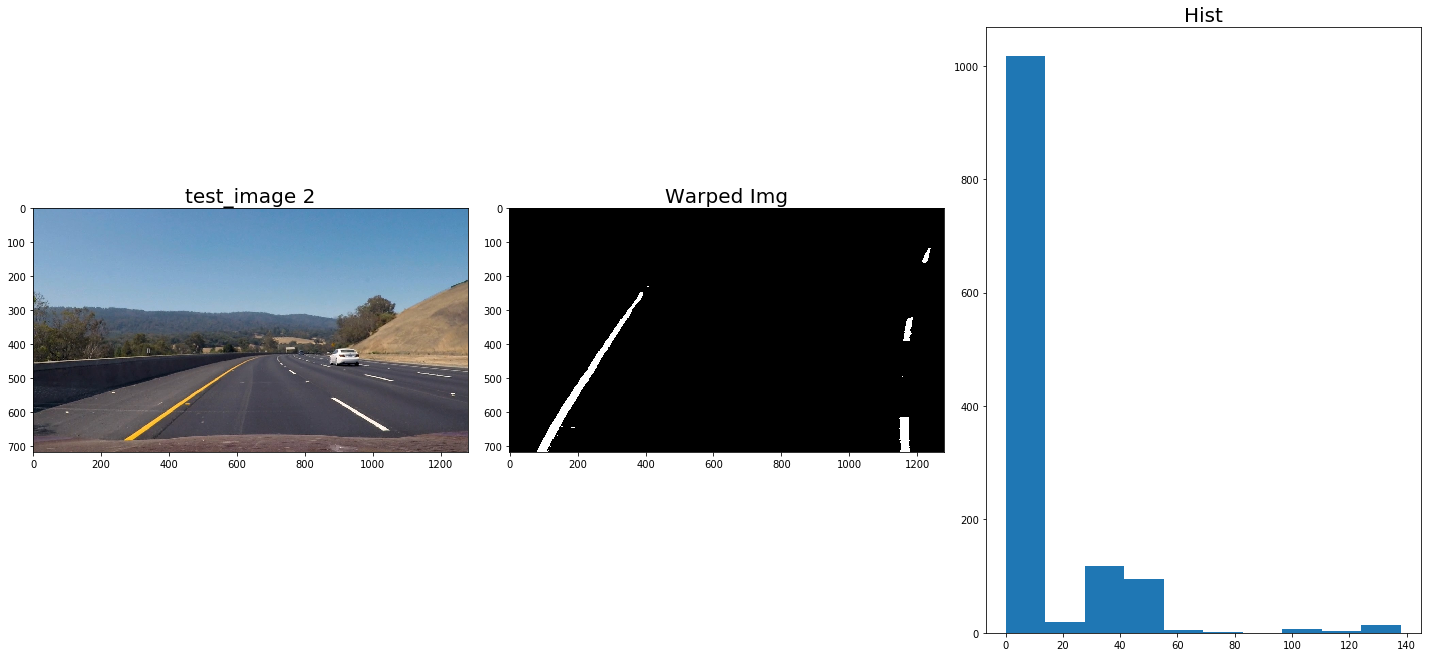

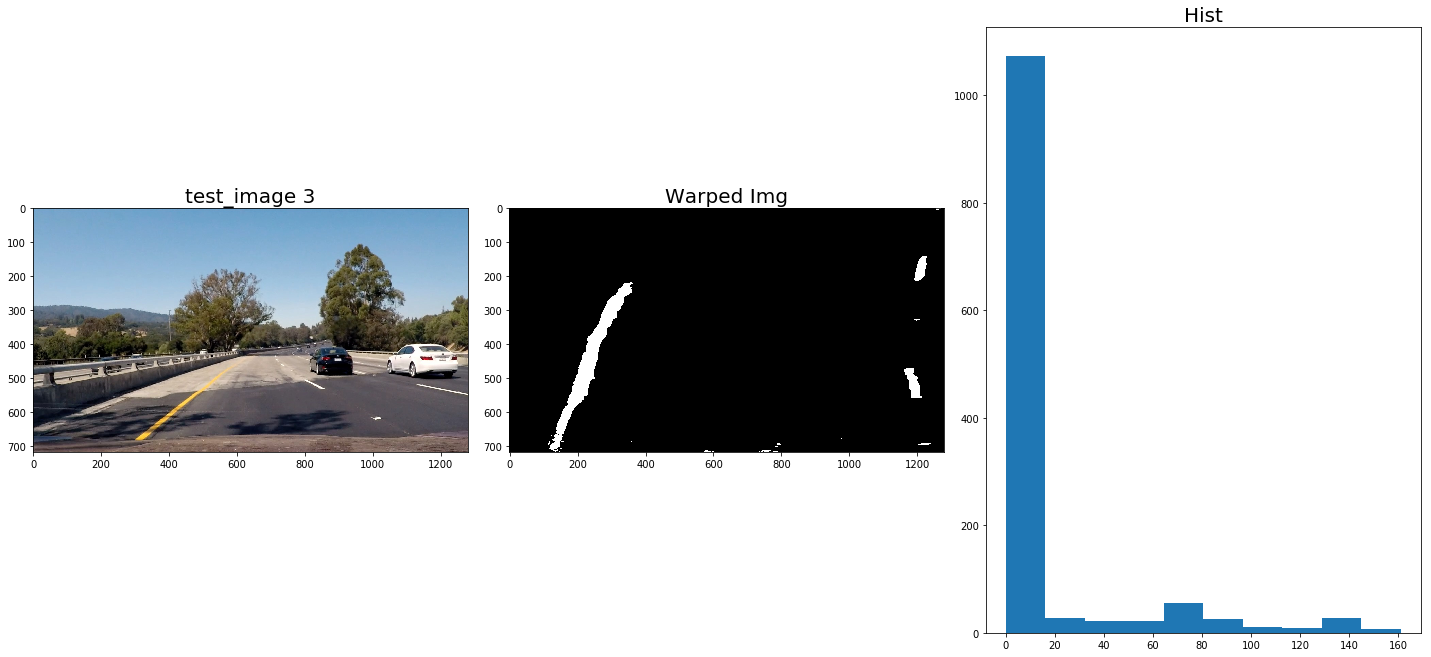

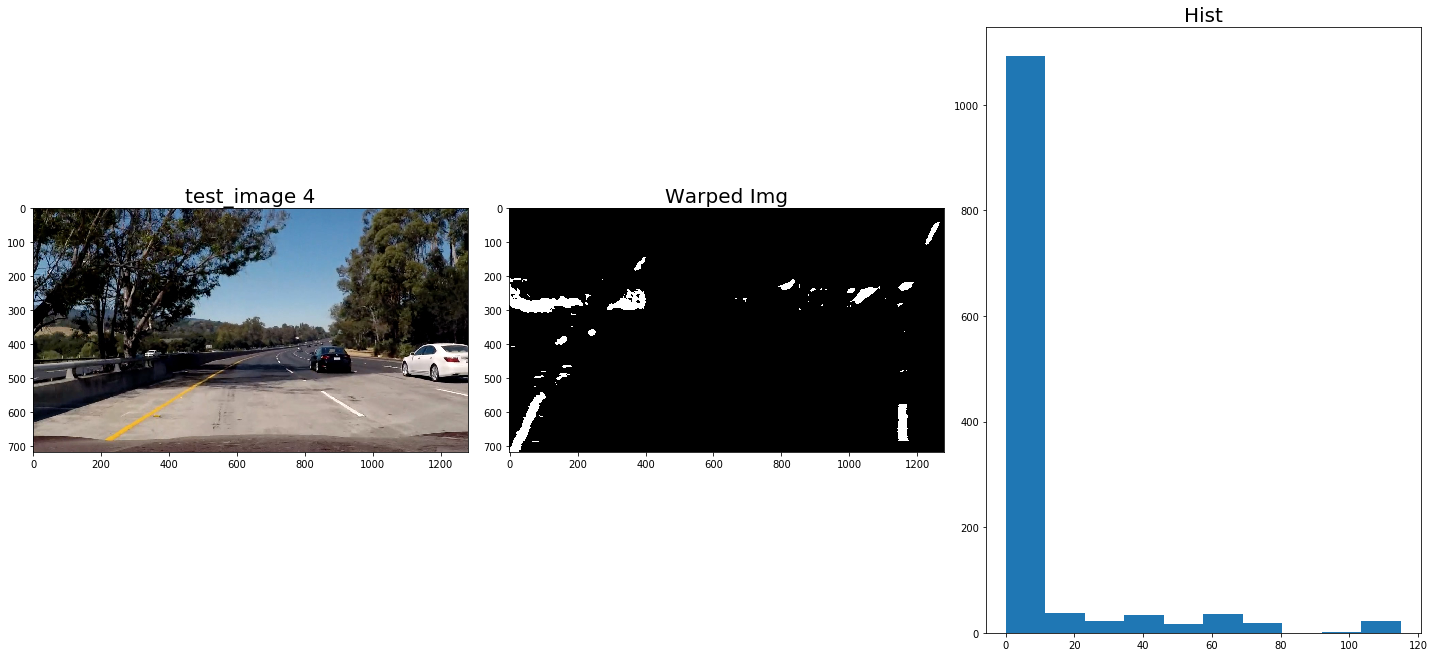

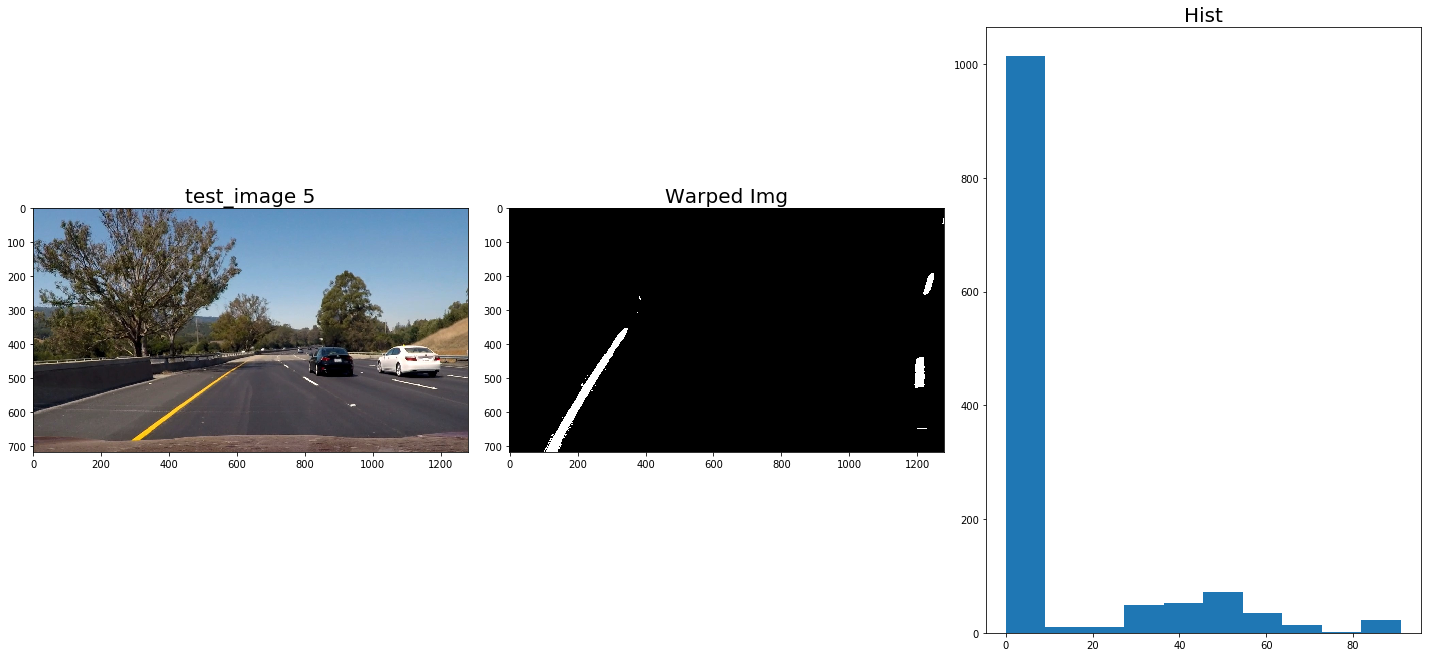

In [10]:
images = glob.glob('test_images/test*.jpg')
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    perspective_img = get_undistored_perspective_image(img)
    warped_thresh_img = apply_new_thresh(perspective_img)
    midpoint = int(warped_thresh_img.shape[0]/2)
    histogram = np.sum(warped_thresh_img[midpoint:,:], axis=0)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('test_image %d' %(idx), fontsize=20)
    ax2.imshow(warped_thresh_img,cmap='gray')
    ax2.set_title('Warped Img', fontsize=20)
    ax3.set_title('Hist', fontsize=20)
    ax3.hist(histogram)
    

In [16]:
from numpy.linalg import inv
def draw_result_lane(orig_image, combined_binary, left_fitx, rightx, ploty,M):
    Minv = inv(M)
    warp_zero = np.zeros_like(combined_binary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    cv2.polylines(color_warp, np.int_([pts]), isClosed=False, color=(0,0,255), thickness = 40)
    cv2.fillPoly(color_warp, np.int_(pts), (34,255,34))
    newwarp = cv2.warpPerspective(color_warp, Minv, (orig_image.shape[1], orig_image.shape[0]))
    result = cv2.addWeighted(orig_image, 1, newwarp, 0.5, 0)
    return result

# Single Image Pipeline For lane Polynomial Fit

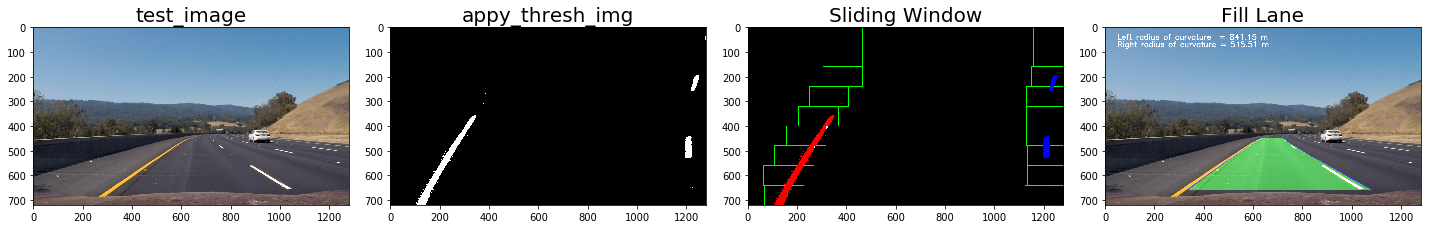

In [22]:
#sliding_window_imgs = glob.glob('test_images/test*.jpg')
#sliding_window_imgs = glob.glob('video_images/*.jpg')

t_img = mpimg.imread('test_images/test3.jpg')
img_size = (t_img.shape[1], t_img.shape[0])
src = np.float32([[550, 450],[720, 450],
                  [1100, 660],[280, 660]])

#dst = np.float32([[300, 0], [980, 0], 
#                 [980, 720],[300, 720]])
dst = np.float32([[0, 0], [1280, 0], 
                 [1250, 720],[40, 720]])
undistort_img = cv2.undistort(img, mtx, dist, None, mtx)
M = cv2.getPerspectiveTransform(src, dst)
bird_eye_img = cv2.warpPerspective(undistort_img, M, img_size)

appy_thresh_img = apply_new_thresh(bird_eye_img)
mid = int(appy_thresh_img.shape[0]/2)
slid_histo= np.sum(appy_thresh_img[mid:,:], axis=0)
leftx_base = np.argmax(slid_histo[:mid])
rightx_base = np.argmax(slid_histo[mid:]) + mid

out_img = np.dstack((appy_thresh_img, appy_thresh_img, appy_thresh_img))*255
# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(appy_thresh_img.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = appy_thresh_img.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 80
# Set minimum number of pixels found to recenter window
minpix = 20
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = appy_thresh_img.shape[0] - (window+1)*window_height
    win_y_high = appy_thresh_img.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2 )
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]

    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
# If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
 #Generate x and y values for plotting
ploty = np.linspace(0, appy_thresh_img.shape[0]-1, appy_thresh_img.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

y_eval = np.max(ploty)
# Calculate Curvature
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
#print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m
fill_lane = draw_result_lane(t_img,appy_thresh_img, left_fitx, right_fitx, ploty,M)
cv2.putText(fill_lane,'Left radius of curvature  = %.2f m'%(left_curverad),(50,50), 16, 1,(255,255,255),2,cv2.LINE_AA)
cv2.putText(fill_lane,'Right radius of curvature = %.2f m'%(right_curverad),(50,80), 16, 1,(255,255,255),2,cv2.LINE_AA)
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 9))
f.tight_layout()
ax1.imshow(t_img)
ax1.set_title('test_image', fontsize=20)
ax2.set_title('appy_thresh_img', fontsize=20)
ax2.imshow(appy_thresh_img,cmap='gray')
ax3.set_title('Sliding Window', fontsize=20)
ax3.imshow(out_img)
ax4.set_title('Fill Lane', fontsize=20)
ax4.imshow(fill_lane)

In [30]:
def fit_polynomial(binary_warped):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
            (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
            (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Calculate Radius of Curvature 
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    m_car = binary_warped.shape[1] / 2
    m_lane = (left_fitx[0]+ rightx[0]) / 2
    offset_right_from_center_m = (m_lane-m_car)*xm_per_pix

    return left_fitx,right_fitx,ploty, left_fit, right_fit, left_curverad, right_curverad, offset_right_from_center_m

# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
def extend_the_poly(binar_image,left_fit, right_fit):
    nonzero = binar_image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binar_image.shape[0]-1, binar_image.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Calculate Radius of Curvature 
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    m_car = binar_image.shape[1] / 2
    m_lane = (leftx[0] + rightx[0]) / 2
    offset_right_from_center_m = (m_lane-m_car)*xm_per_pix
    
    return left_fitx, right_fitx,ploty, left_curverad, right_curverad, offset_right_from_center_m

In [31]:
video_imgs = glob.glob('test_image/*.jpg')
for idx, fname in enumerate(video_imgs):
    test_vid_img = mpimg.imread(fname)
    test_vid_bird_eye_img = get_undistored_perspective_image(test_vid_img)
    test_vid_warped_img = apply_new_thresh(test_vid_bird_eye_img)
    left_fitx, right_fitx, ploty, left_fit, right_fit,left_cur,right_cur,pos = fit_polynomial(test_vid_warped_img)
    vid_fill_lane = draw_result_lane(test_vid_img,test_vid_warped_img, left_fitx, right_fitx, ploty)
    cv2.putText(vid_fill_lane,'Left radius of curvature  = %.2f m'%(left_cur),(50,50), 16, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(vid_fill_lane,'Right radius of curvature = %.2f m'%(right_curverad),(50,80), 16, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(vid_fill_lane,'Distance From Center = %.2f m'%(pos),(50,120), 16, 1,(255,255,255),2,cv2.LINE_AA)
    f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(test_vid_img)
    ax1.set_title('Video_image', fontsize=20)
    ax2.set_title('Fill Lane', fontsize=20)
    ax2.imshow(vid_fill_lane)

In [32]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_left_fit = None
        self.current_right_fit = None
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        self.cnt_sanity_check_failed = 0
        
Left = Line()
Right = Line()

In [40]:
def radius_of_curvature(ploty,fitx):
    y_eval = np.max(ploty)
    # Calculate Curvature
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    fit_cr = np.polyfit(ploty*ym_per_pix, fitx*xm_per_pix, 2)
    curverad = ((1 + (2*fit_cr[0]*y_eval*ym_per_pix + fit_cr[1])**2)**1.5) / np.absolute(2*fit_cr[0])

    return curverad

In [41]:
def curvature_sanity_check(R0, ploty, fitx):
    if(np.any(fitx)<= 0):
        print("All values are zero")
        return False
    l_cur = radius_of_curvature(ploty, fitx)
    diff = abs(l_cur-R0)
    if diff <= 0.2:
        return True
    else:
        return False  

In [42]:
def process_not_optimal_video(v_img):
    v_bird_eye_img = get_undistored_perspective_image(v_img)
    v_warped_img = apply_new_thresh(v_bird_eye_img)
    left_fitx, right_fitx, ploty, left_fit, right_fit,left_curverad, right_curverad, offset_right_from_center_m = fit_polynomial(v_warped_img)
    v_filled_lane = draw_result_lane(v_img,v_warped_img, left_fitx, right_fitx, ploty)
    l_curvead = radius_of_curvature(ploty, left_fitx)
    r_curvead = radius_of_curvature(ploty, right_fitx)
    cv2.putText(v_filled_lane,'Left radius of curvature  = %.2f m'%(l_curvead),(50,50), 16, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(v_filled_lane,'Right radius of curvature = %.2f m'%(r_curvead),(50,80), 16, 1,(255,255,255),2,cv2.LINE_AA)

    return v_filled_lane


In [43]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_left_fit = None
        self.current_right_fit = None
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        self.cnt_sanity_check_failed = 0
        
Left = Line()
Right = Line()

In [44]:
def process_video(video_img):
    img_size = (t_img.shape[1], t_img.shape[0])
    src = np.float32([[550, 450],[720, 450],
                      [1100, 660],[280, 660]])

    #dst = np.float32([[300, 0], [980, 0], 
    #                 [980, 720],[300, 720]])
    dst = np.float32([[0, 0], [1280, 0], 
                     [1250, 720],[40, 720]])
    undistort_img = cv2.undistort(img, mtx, dist, None, mtx)
    M = cv2.getPerspectiveTransform(src, dst)
    bird_eye_img = cv2.warpPerspective(undistort_img, M, img_size)

    vid_warped_img = apply_new_thresh(bird_eye_img)
    if (Left.detected == False or Right.detected == False):
        left_fitx, right_fitx, ploty, left_fit, right_fit, l_cur, r_cur, dist_from_cent= fit_polynomial(vid_warped_img)
        Left.detected = True
        Left.current_left_fit = left_fit
        Left.current_right_fit = right_fit
        Left.allx = left_fitx
        Left.ally = ploty
        Right.detected = True
        Right.allx = right_fitx
        Right.ally = ploty
        Left.curvead = l_cur
        Right.curvead = r_cur
        Left.line_base_pos = dist_from_cent
    else:
        left_fitx, right_fitx,ploty, l_cur, r_cur, dist_from_cent = extend_the_poly(vid_warped_img,Left.current_left_fit, Left.current_right_fit)
        if curvature_sanity_check(Left.curvead, ploty,left_fitx) and curvature_sanity_check(Right.curvead,ploty, right_fitx):
            Left.detected = True
            Right.detected = True
            Left.allx = left_fitx
            Left.ally = ploty
            Right.allx = right_fitx
            Right.ally = ploty
            Left.curvead = l_cur
            Right.curvead = r_cur
            Left.line_base_pos = dist_from_cent
        else :
            #Use Old Value
            Left.cnt_sanity_check_failed += 1
            left_fitx, right_fitx, ploty, left_fit, right_fit, l_cur, r_cur, dist_from_cent= fit_polynomial(vid_warped_img)
            Left.detected = True
            Left.current_left_fit = left_fit
            Left.current_right_fit = right_fit
            Left.allx = left_fitx
            Left.ally = ploty
            Right.detected = True
            Right.allx = right_fitx
            Right.ally = ploty
            Left.curvead = l_cur
            Right.curvead = r_cur
            Left.line_base_pos = dist_from_cent
            
    
    filled_lane = draw_result_lane(video_img,vid_warped_img, left_fitx, right_fitx, ploty,M)
    cv2.putText(filled_lane,'Left radius of curvature  = %.2f m'%(Left.curvead),(50,50), 16, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(filled_lane,'Right radius of curvature = %.2f m'%(Right.curvead),(50,80), 16, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(filled_lane,'Distance From Center = %.2fm'%(Left.line_base_pos),(50,120), 16, 1,(255,255,255),2,cv2.LINE_AA)

    return filled_lane

In [45]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os
output = 'laneDetectedVideo_5.mp4'
clip1 = VideoFileClip("project_video.mp4").subclip(0,10)
white_clip = clip1.fl_image(process_video) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

print("Failure cnt={}".format(Left.cnt_sanity_check_failed))

[MoviePy] >>>> Building video laneDetectedVideo_5.mp4
[MoviePy] Writing video laneDetectedVideo_5.mp4


100%|█████████▉| 250/251 [00:37<00:00,  6.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: laneDetectedVideo_5.mp4 

CPU times: user 56.1 s, sys: 5.9 s, total: 1min 2s
Wall time: 38.5 s
Failure cnt=250


In [47]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))